# Assignment 3
# Eric Kofoid
## Question 1

In [1]:
library(fma)
library(zoo)

Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



### 1a) Add years

In [2]:
oly_real_appended = olympic
oly_real_appended = rbind(oly_real_appended, data.frame(Year = 2000, time = 43.84))
oly_real_appended = rbind(oly_real_appended, data.frame(Year = 2004, time = 44.00))
oly_real_appended = rbind(oly_real_appended, data.frame(Year = 2008, time = 43.75))
oly_real_appended = rbind(oly_real_appended, data.frame(Year = 2012, time = 43.94))
oly_real_appended = rbind(oly_real_appended, data.frame(Year = 2016, time = 43.03))

oly_appended_rowcount = nrow(oly_real_appended)

### 1b) Main features.
* Decreasing over time
* Decrease is pretty consistent, except for the decrease in the first olympic year, which looks like an outlier.
* Missing some years, war years?

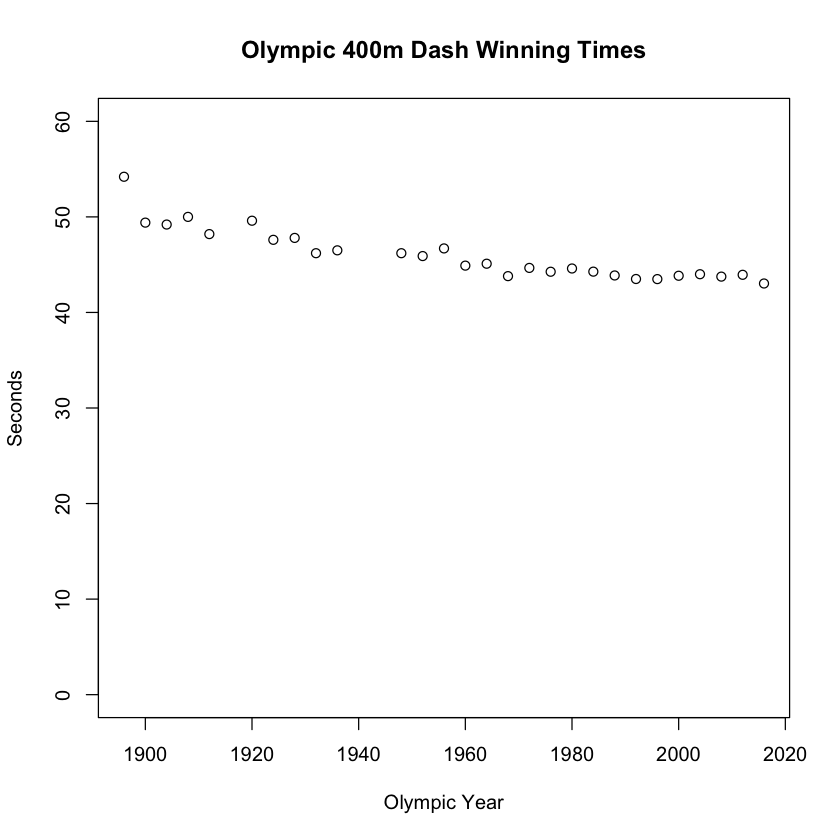

In [3]:
plot(oly_real_appended
     , main="Olympic 400m Dash Winning Times"
     , ylab="Seconds"
     , xlab="Olympic Year"
     , ylim=c(0,60))

### 1c)  Regression Line & Avg rate of decrease

To get the average rate of decrease in time/year I use the growth rate formula, the rate of descrease is .3989 seconds.

In [4]:
# Average Rate of decrease
(oly_real_appended$time[oly_appended_rowcount] - oly_real_appended$time[1])/ oly_appended_rowcount

[1] -0.3989286

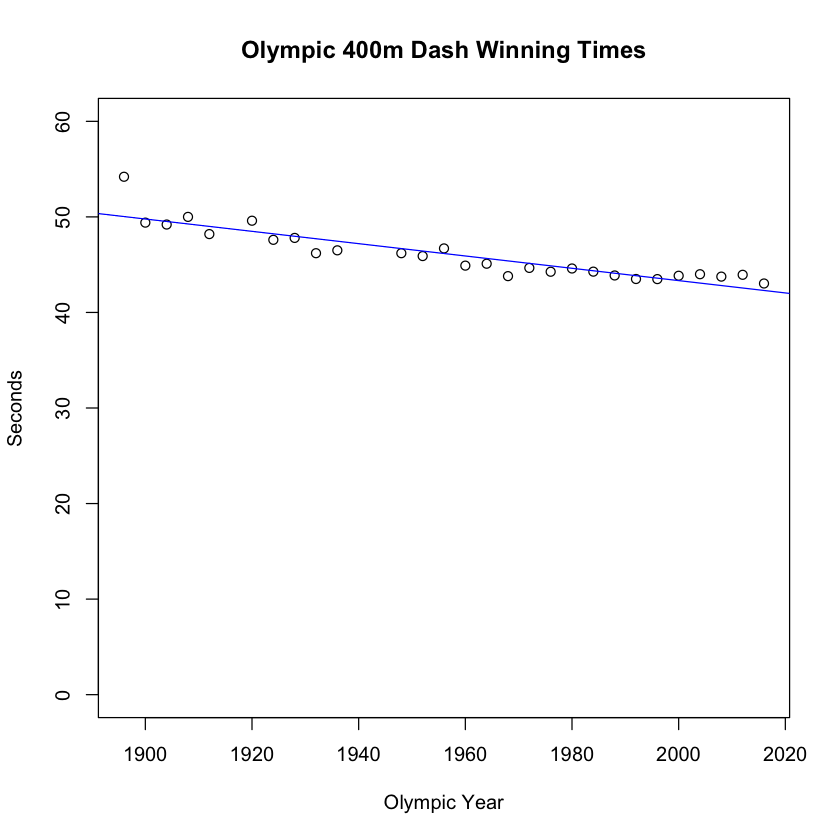

In [5]:
plot(oly_real_appended
     , main="Olympic 400m Dash Winning Times"
     , ylab="Seconds"
     , xlab="Olympic Year"
     , ylim=c(0,60))
oly_real_appended_reg = lm(time ~ Year, oly_real_appended)
abline(oly_real_appended_reg, col="blue")

### 1d) Residual Plot

Other than the outlier in 1900, these residuals seem pretty randomly associated around the 0 line. I would say that this linear reqression model fits the data pretty well. 

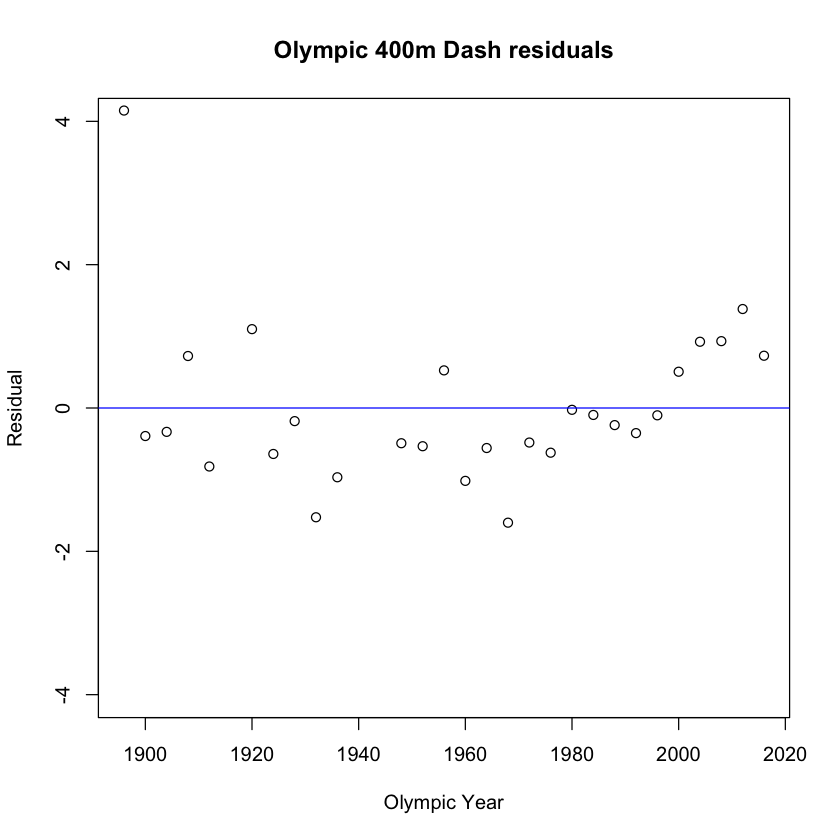

In [6]:
plot(oly_real_appended$Year, oly_real_appended_reg$residuals
     , main="Olympic 400m Dash residuals"
     , xlab="Olympic Year"
     , ylab="Residual"
     , ylim = c(-4, 4))
abline(0, 0, col="blue")

### 1e) & 1f)
I don't want to include 2000-2016 in the model that I build to predict them, so I am building new model.
We are assuming that as the years progress the time will continue to get better, based on previous experience that seems logical, but then everyone is getting fatter... 

The results aren't good. They decrease to fast compared to actuals, I think they would love to be down to 41.27, the world record was set this year @ 43.03, my prediction is almost 2 seconds faster.

In [7]:
olympic_lm = lm(time ~ Year, olympic)
future = data.frame(Year=seq(2000, 2016, len=5))
predicts = predict(olympic_lm, future, interval="predict")

prediction = data.frame(cbind(future, time=predicts))
prediction

Year,time.fit,time.lwr,time.upr
2000,42.49977,40.05401,44.94554
2004,42.19261,39.72657,44.65866
2008,41.88545,39.39782,44.37308
2012,41.57829,39.06780,44.08879
2016,41.27113,38.73654,43.80573


In [8]:
tail(oly_real_appended, 5)

,Year,time
24,2000,43.84
25,2004,44.00
26,2008,43.75
27,2012,43.94
28,2016,43.03


### 1f) addendum
In looking at the general plot, I see a bit of flucuation from 1900-1960, but then it gets a bit tighter. I am going to just use just 1960 on for my regression. This is a bit better, but still increasing a bit faster rate.

In [9]:
oly_new = tail(olympic, 10)
oly_lm = lm(time ~ Year, oly_new)
predicts_new = predict(oly_lm, future, interval="predict")

prediction = data.frame(cbind(future, time=predicts_new))
prediction

Year,time.fit,time.lwr,time.upr
2000,43.43267,42.38626,44.47908
2004,43.28497,42.18790,44.38204
2008,43.13727,41.98390,44.29064
2012,42.98958,41.77506,44.20409
2016,42.84188,41.56206,44.12170
